## ML - Students Depression Stat

### **FILE PATH**

In [66]:
file_path =r"D:\N Cloud\OneDrive\M.Sc Data Science\Sem 2\Project\Student  Depression\Student Depression Dataset.csv"

In [67]:
import pandas as pd

# Load the dataset to inspect its structure
data = pd.read_csv(file_path)

# Display dataset info and first few rows for initial inspection
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [68]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.00,Visakhapatnam,Student,5.00,0.00,8.97,2.00,0.00,5-6 hours,Healthy,B.Pharm,Yes,3.00,1.00,No,1
1,8,Female,24.00,Bangalore,Student,2.00,0.00,5.90,5.00,0.00,5-6 hours,Moderate,BSc,No,3.00,2.00,Yes,0
2,26,Male,31.00,Srinagar,Student,3.00,0.00,7.03,5.00,0.00,Less than 5 hours,Healthy,BA,No,9.00,1.00,Yes,0
3,30,Female,28.00,Varanasi,Student,3.00,0.00,5.59,2.00,0.00,7-8 hours,Moderate,BCA,Yes,4.00,5.00,Yes,1
4,32,Female,25.00,Jaipur,Student,4.00,0.00,8.13,3.00,0.00,5-6 hours,Moderate,M.Tech,Yes,1.00,1.00,No,0


In [69]:
# Checking for missing values
missing_values = data.isnull().sum()
display(missing_values)

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [70]:
# Removing Missing Values (only 3 missing values)
data.dropna(inplace=True)
data.isnull().sum()
#data.shape

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [71]:
# Outliers
import pandas as pd
# Assuming your DataFrame is named 'df' and contains the relevant numerical columns
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                  'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
                  'Financial Stress']
# Function to detect and handle outliers using IQR
for col in numerical_cols:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
  print(f"{col}: {outliers.shape[0]} outliers detected")


Age: 12 outliers detected
Academic Pressure: 0 outliers detected
Work Pressure: 3 outliers detected
CGPA: 9 outliers detected
Study Satisfaction: 0 outliers detected
Job Satisfaction: 8 outliers detected
Work/Study Hours: 0 outliers detected
Financial Stress: 0 outliers detected


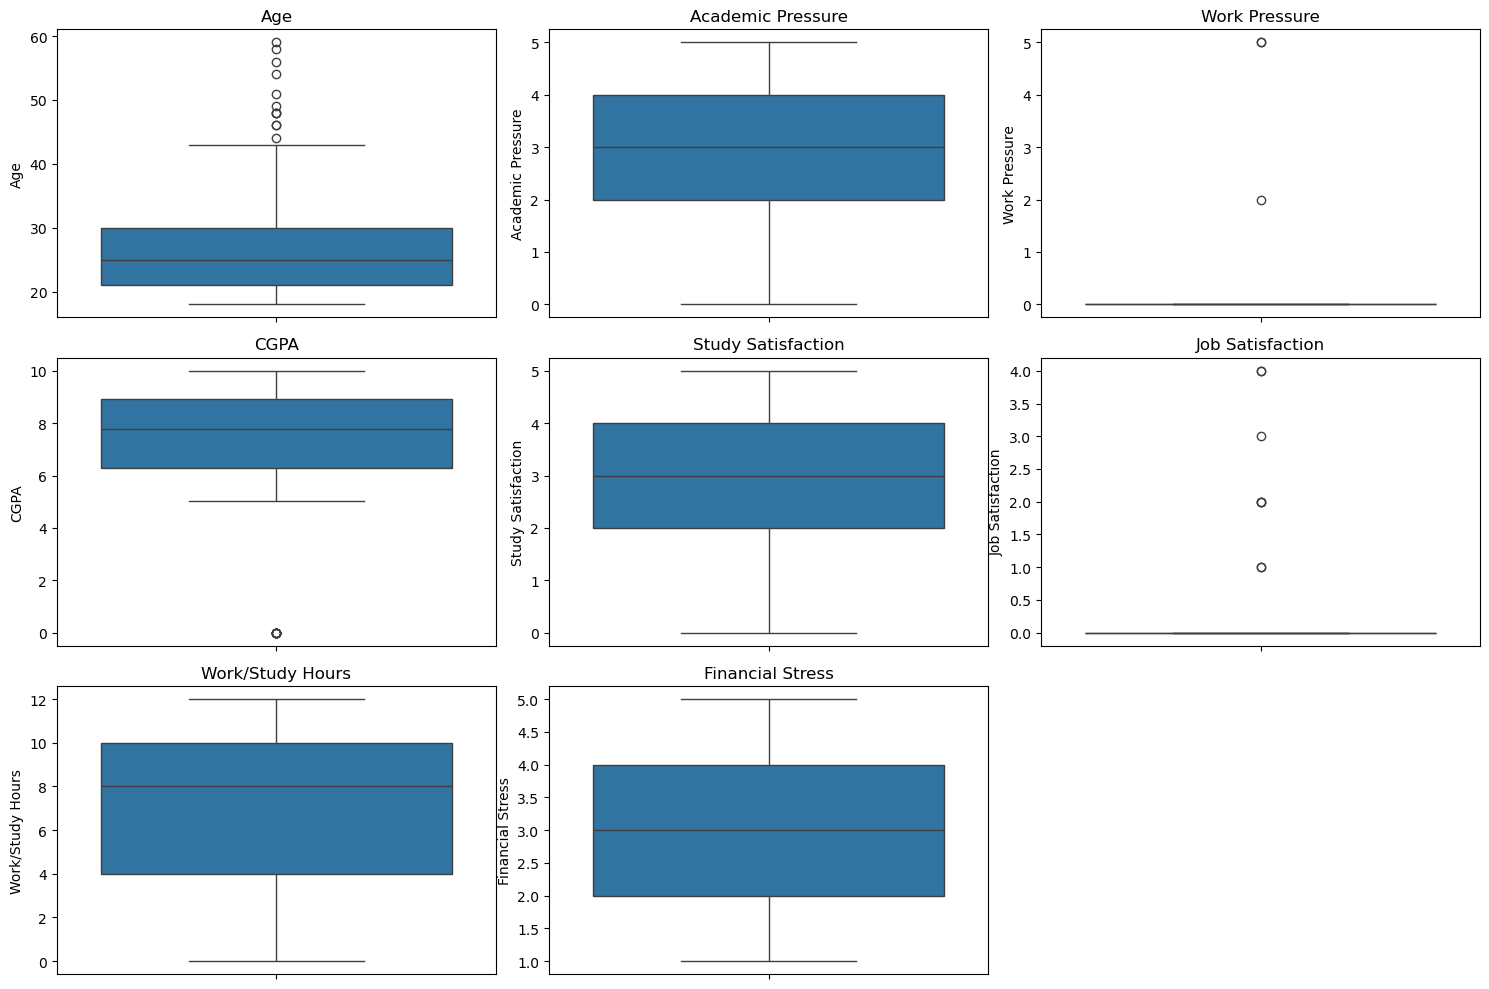

In [72]:
#Outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'data' and contains the relevant numerical columns
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                  'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
                  'Financial Stress']

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  # Adjust subplot layout as needed
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()


In [73]:
#Remove the outlier (drop work pressure and job satisfaction column) and remove the rows having cgpa = 0

# Drop 'Work Pressure' and 'Job Satisfaction' columns
data = data.drop(['Work Pressure', 'Job Satisfaction'], axis=1)

# Remove rows where 'CGPA' is 0
data = data[data['CGPA'] != 0]


non_cities = {'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi', 'City', '3.0', 'Less than 5 Kalyan', 
              'Mira', 'Harsha', 'Vaanya', 'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 
              'ME', 'M.Com', 'Nalyan', 'Mihir', 'Nalini', 'Nandini'}
data = data[~data['City'].isin(non_cities)]

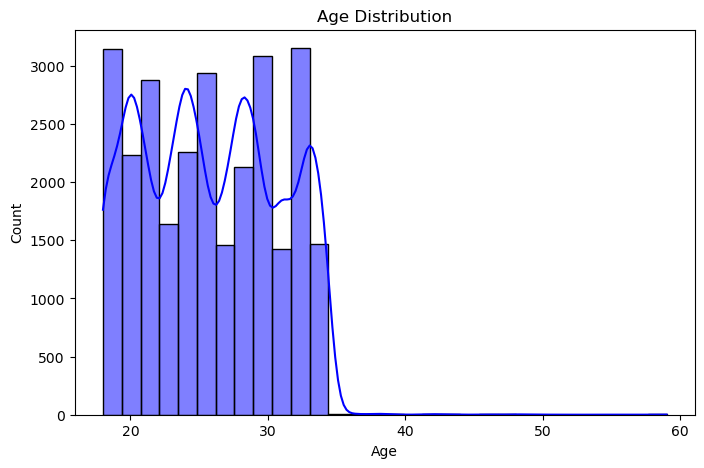

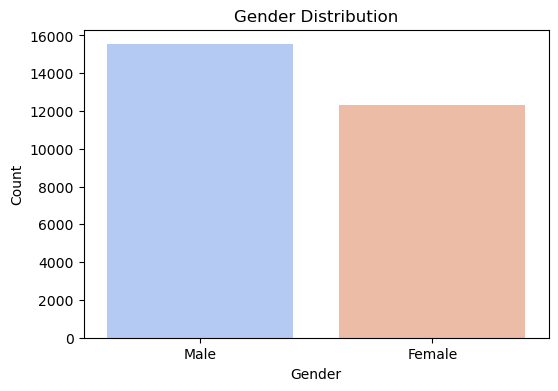

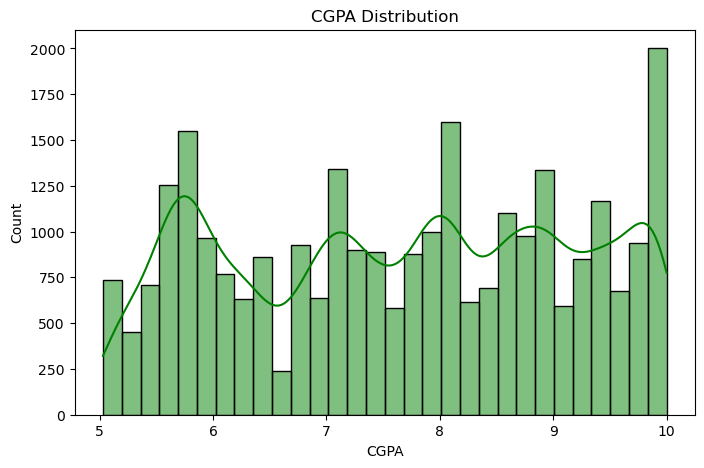

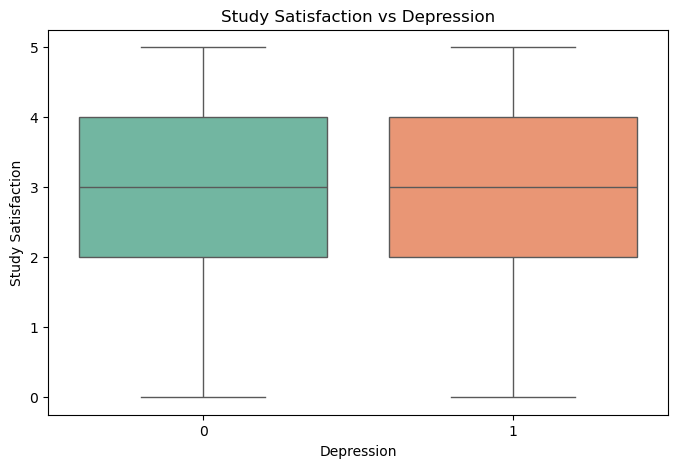

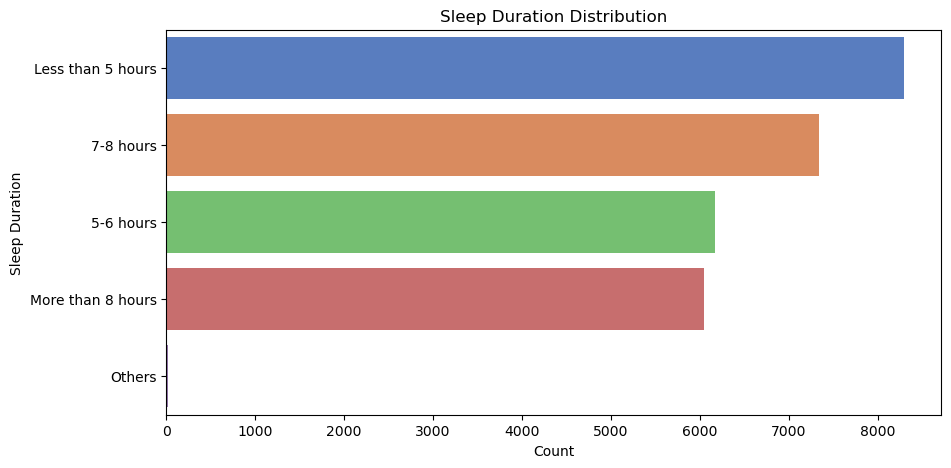

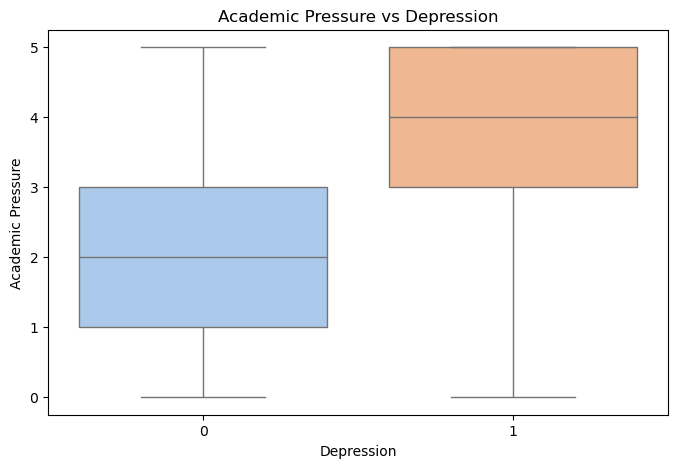

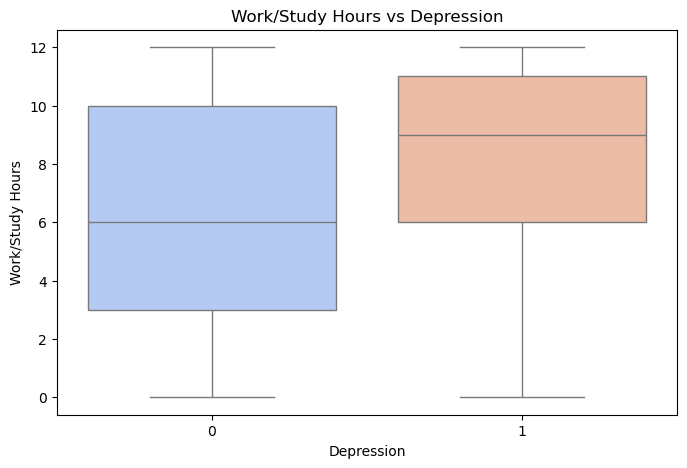

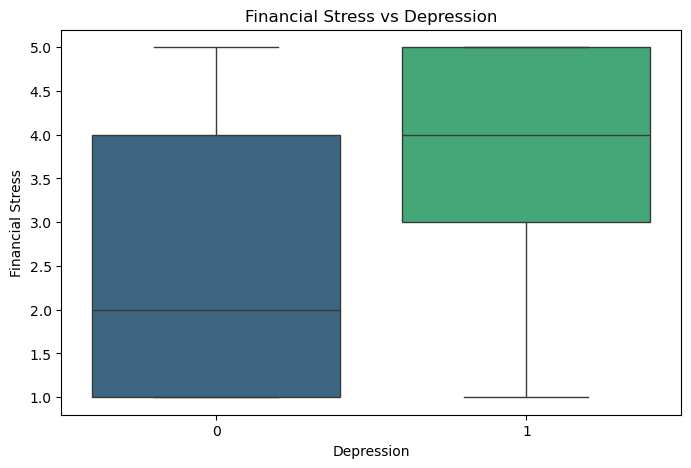

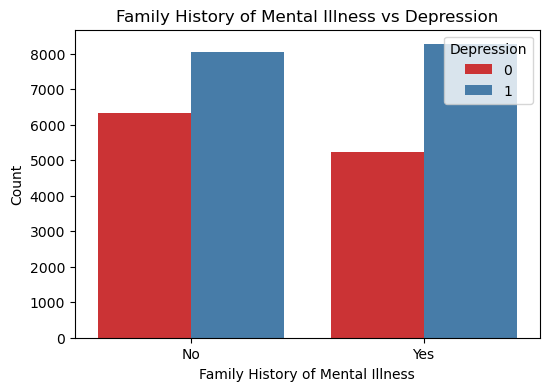

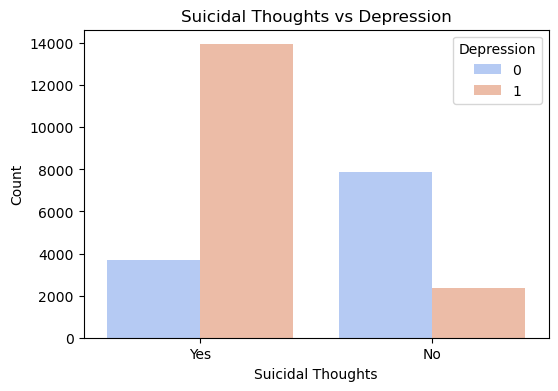

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#EDA

# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# CGPA Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['CGPA'], bins=30, kde=True, color="green")
plt.title("CGPA Distribution")
plt.xlabel("CGPA")
plt.ylabel("Count")
plt.show()

# Study Satisfaction vs Depression
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='Study Satisfaction', data=data, palette="Set2")
plt.title("Study Satisfaction vs Depression")
plt.xlabel("Depression")
plt.ylabel("Study Satisfaction")
plt.show()

# Sleep Duration Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y='Sleep Duration', data=data, order=data['Sleep Duration'].value_counts().index, palette="muted")
plt.title("Sleep Duration Distribution")
plt.xlabel("Count")
plt.ylabel("Sleep Duration")
plt.show()

# Relationship between Academic Pressure and Depression
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='Academic Pressure', data=data, palette="pastel")
plt.title("Academic Pressure vs Depression")
plt.xlabel("Depression")
plt.ylabel("Academic Pressure")
plt.show()

# Work/Study Hours vs Depression
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='Work/Study Hours', data=data, palette="coolwarm")
plt.title("Work/Study Hours vs Depression")
plt.xlabel("Depression")
plt.ylabel("Work/Study Hours")
plt.show()

# Financial Stress vs Depression
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='Financial Stress', data=data, palette="viridis")
plt.title("Financial Stress vs Depression")
plt.xlabel("Depression")
plt.ylabel("Financial Stress")
plt.show()

# Family History of Mental Illness vs Depression
plt.figure(figsize=(6, 4))
sns.countplot(x='Family History of Mental Illness', hue='Depression', data=data, palette="Set1")
plt.title("Family History of Mental Illness vs Depression")
plt.xlabel("Family History of Mental Illness")
plt.ylabel("Count")
plt.legend(title="Depression", loc="upper right")
plt.show()

# Suicidal Thoughts vs Depression
plt.figure(figsize=(6, 4))
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=data, palette="coolwarm")
plt.title("Suicidal Thoughts vs Depression")
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Count")
plt.legend(title="Depression", loc="upper right")
plt.show()

# **INFERENCE FROM EDA**


**Age Distribution** – Most students fall within a specific age range, with a slight skew indicating either a younger or older concentration.

**Gender Distributio** – There is an imbalance in gender representation, which may influence the overall trends in depression and other factors.

**CGPA Distribution** – CGPA follows a normal distribution, with a majority of students achieving moderate academic performance.

**Study Satisfaction vs Depression** – Students with lower study satisfaction tend to have higher depression levels, indicating a possible correlation.

**Sleep Duration Distribution** – Many students have insufficient sleep, which might contribute to higher stress and depression.

**Academic Pressure vs Depression** – Higher academic pressure is generally associated with increased depression levels.

**Work/Study Hours vs Depression** – Longer work/study hours show a trend toward higher depression, but the relationship is not very strong.

**Financial Stress vs Depression** – Increased financial stress is strongly correlated with higher depression levels.

**Family History of Mental Illness vs Depression** – Students with a family history of mental illness show a higher likelihood of depression, indicating a genetic or environmental influence.

**Suicidal Thoughts vs Depression** – Students with suicidal thoughts have a higher chance of being depressed, highlighting the need for mental health interventions.

**Key Insight**
Academic and financial stress, study dissatisfaction, and family history of mental illness appear to be significant contributors to student depression.
Poor sleep and long work hours may also influence mental health but require further analysis.


## code list

In [75]:
# Encoding
import pandas as pd
import joblib
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming your DataFrame is named 'data'
data1 = data.copy()  # Replace 'data1' with the actual DataFrame name if different

# Step 1: Remove Outliers
numerical_cols = ['Age', 'Academic Pressure', 'CGPA',
                  'Study Satisfaction', 'Work/Study Hours',
                  'Financial Stress']

# Set a threshold for z-score
threshold = 3

# Identify outlier indices across all numerical columns
outlier_indices = set()  # Use a set to handle duplicate indices
for column in numerical_cols:
    column_outliers = data1[zscore(data1[column]).abs() > threshold].index
    outlier_indices.update(column_outliers)

# Drop outlier rows
data_no_outliers = data1.drop(index=list(outlier_indices))

print("Original DataFrame shape:", data1.shape)
print("DataFrame shape after removing outliers:", data_no_outliers.shape)

# Step 2: Encode Categorical Columns
object_cols = ['Gender', 'City', 'Profession', 'Degree', 'Sleep Duration',
               'Dietary Habits', 'Have you ever had suicidal thoughts ?',
               'Family History of Mental Illness']

# Create encoders dictionary
label_encoders = {}
onehot_encoders = {}

for col in object_cols:
    if data_no_outliers[col].nunique() <= 2:  # Label Encoding for binary features
        le = LabelEncoder()
        data_no_outliers[col] = le.fit_transform(data_no_outliers[col])
        label_encoders[col] = le  # Store label encoder
    else:  # One-Hot Encoding for multi-category features
        ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_data = ohe.fit_transform(data_no_outliers[[col]])
        onehot_encoders[col] = ohe  # Store one-hot encoder

        # Create a DataFrame for encoded features
        encoded_df = pd.DataFrame(encoded_data,
                                  columns=ohe.get_feature_names_out([col]),
                                  index=data_no_outliers.index)
        # Drop original column
        data_no_outliers.drop(columns=[col], inplace=True)
        # Concatenate encoded features back to the main DataFrame
        data_no_outliers = pd.concat([data_no_outliers, encoded_df], axis=1)

print("DataFrame shape after encoding categorical columns:", data_no_outliers.shape)

# Save Label Encoders and One-Hot Encoders
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(onehot_encoders, "onehot_encoders.pkl")

print("Encoders saved successfully!")



Original DataFrame shape: (27864, 16)
DataFrame shape after removing outliers: (27845, 16)
DataFrame shape after encoding categorical columns: (27845, 93)
Encoders saved successfully!


Depression
1    16311
0    11534
Name: count, dtype: int64


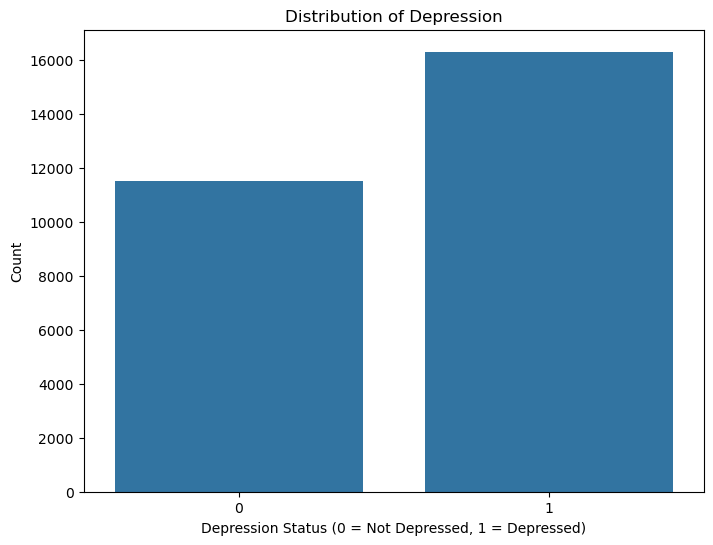

Class Percentages:
Depression
1   58.58
0   41.42
Name: count, dtype: float64


In [57]:
#check for data imbalance

import matplotlib.pyplot as plt
# Check for data imbalance in the 'depressed' column
depression_counts = data_no_outliers['Depression'].value_counts()
print(depression_counts)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Depression', data=data_no_outliers)
plt.title('Distribution of Depression')
plt.xlabel('Depression Status (0 = Not Depressed, 1 = Depressed)')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of each class
class_percentages = depression_counts / len(data_no_outliers) * 100
print(f"Class Percentages:\n{class_percentages}")


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Separating features and target
X = data_no_outliers.drop(['id', 'Depression'], axis=1)  # Dropping 'id' and target variable
y = data_no_outliers['Depression']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




In [31]:
!pip install lazypredict

In [32]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

display(models)

c:\Users\nemun\anaconda3\lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
100%|██████████| 31/31 [05:21<00:00, 10.04s/it]

[LightGBM] [Info] Number of positive: 13060, number of negative: 9236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 22296, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585755 -> initscore=0.346445
[LightGBM] [Info] Start training from score 0.346445


100%|██████████| 31/31 [05:21<00:00, 10.37s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.85,0.84,0.84,0.85,0.15
LogisticRegression,0.85,0.84,0.84,0.85,0.22
LGBMClassifier,0.85,0.84,0.84,0.85,0.42
CalibratedClassifierCV,0.85,0.84,0.84,0.85,1.31
LinearSVC,0.85,0.84,0.84,0.85,0.39
LinearDiscriminantAnalysis,0.85,0.84,0.84,0.85,0.42
RidgeClassifierCV,0.85,0.84,0.84,0.85,0.34
RidgeClassifier,0.85,0.84,0.84,0.85,0.19
AdaBoostClassifier,0.85,0.84,0.84,0.85,1.96


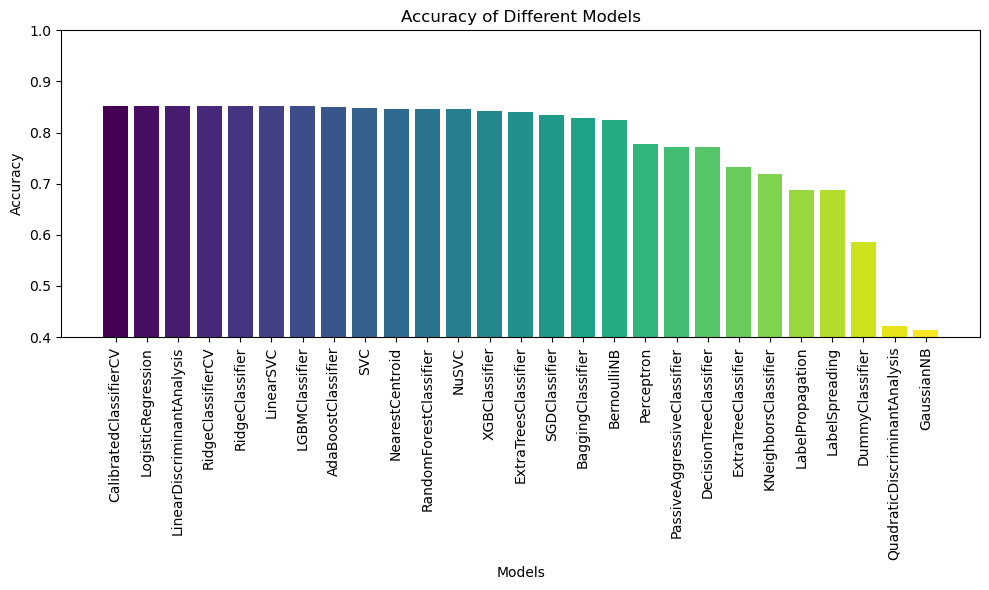

In [33]:
# prompt: visualize the accuracy of various method predicted by lazypredict ( make colorful)

import matplotlib.pyplot as plt

# Assuming 'models' DataFrame from lazypredict is available
plt.figure(figsize=(10, 6))
models.sort_values(by=['Accuracy'], ascending=False, inplace=True)
plt.bar(models.index, models['Accuracy'], color=plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(models))))
plt.xticks(rotation=90)
plt.ylim(0.4,1.0)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.tight_layout()
plt.show()

## LOGISTIC REGRESSION

In [77]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)  # You can adjust hyperparameters here
logreg_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(logreg_model, "logreg_model.pkl")

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix

Accuracy: 0.8466511043275274
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2307
           1       0.86      0.89      0.87      3262

    accuracy                           0.85      5569
   macro avg       0.84      0.84      0.84      5569
weighted avg       0.85      0.85      0.85      5569

Confusion Matrix:


array([[1818,  489],
       [ 365, 2897]], dtype=int64)

##KNN CLASSIFIER

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:5.2f}")

print(classification_report(y_test, y_pred_knn))

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:")
conf_matrix_knn



KNN Accuracy:  0.80
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      2309
           1       0.81      0.86      0.84      3265

    accuracy                           0.80      5574
   macro avg       0.80      0.79      0.79      5574
weighted avg       0.80      0.80      0.80      5574

KNN Confusion Matrix:


array([[1645,  664],
       [ 447, 2818]], dtype=int64)

## SVC CLassifier

In [36]:
from sklearn.svm import SVC

# Initialize and train the SVC model
svc_model = SVC(random_state=42)  # You can adjust hyperparameters here
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc_model.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc:5.2f}")

print(classification_report(y_test, y_pred_svc))

conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("SVC Confusion Matrix:")
conf_matrix_svc


SVC Accuracy:  0.85
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2309
           1       0.85      0.90      0.88      3265

    accuracy                           0.85      5574
   macro avg       0.85      0.84      0.84      5574
weighted avg       0.85      0.85      0.85      5574

SVC Confusion Matrix:


array([[1811,  498],
       [ 336, 2929]], dtype=int64)

## RANDOM FOREST CLASSIFIER

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:5.2f}")

print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
conf_matrix_rf

Random Forest Accuracy:  0.84
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2307
           1       0.85      0.88      0.86      3262

    accuracy                           0.84      5569
   macro avg       0.84      0.83      0.83      5569
weighted avg       0.84      0.84      0.84      5569

Random Forest Confusion Matrix:


array([[1783,  524],
       [ 379, 2883]], dtype=int64)

## Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:5.2f}")

print(classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
conf_matrix_dt


Decision Tree Accuracy:  0.77
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      2307
           1       0.80      0.80      0.80      3262

    accuracy                           0.77      5569
   macro avg       0.76      0.76      0.76      5569
weighted avg       0.77      0.77      0.77      5569

Decision Tree Confusion Matrix:


array([[1676,  631],
       [ 664, 2598]], dtype=int64)